# SymPyによる微積分

対応する動画：[理系学生のためのSymPyによる微分積分【研究で使うPython #71】](https://youtu.be/rEE3Asn733g)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## ライブラリのインポート

In [1]:
import sympy as sp

# グラフ用
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 極限

In [2]:
x = sp.Symbol('x')

In [3]:
expr = (x+1)/(3*x - 3)
expr

(x + 1)/(3*x - 3)

$$
\lim_{x \to 0} \frac{x+1}{3x-3}
$$

In [4]:
sp.limit(expr, x, 0)

-1/3

In [5]:
expr.subs(x, 0)

-1/3

In [6]:
expr = 5/(x - 2)**2
expr

5/(x - 2)**2

$$
\lim_{x \to 2} \frac{5}{(x-2)^2}
$$

In [7]:
sp.limit(expr, x, 2)

oo

In [8]:
expr = 1/x
expr

1/x

$$
\lim_{x \to 0} \frac{1}{x}
$$

In [9]:
# 右から0に近づける
sp.limit(expr, x, 0)

oo

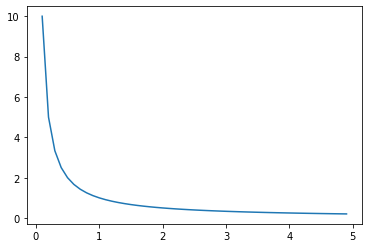

In [10]:
x = np.arange(0.1, 5, 0.1)
y = 1/x

plt.plot(x, y)
plt.show()

In [11]:
x = sp.Symbol('x')
# 左から0に近づける
sp.limit(expr, x, 0, '-')

-oo

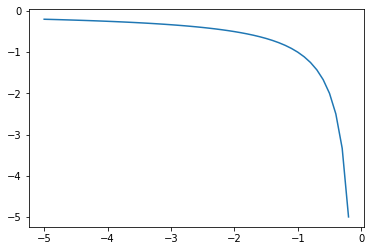

In [12]:
x = np.arange(-5, -0.1, 0.1)
y = 1/x

plt.plot(x, y)
plt.show()

In [13]:
x = sp.Symbol('x')
expr = (5*x**2 + 2*x)/(2*x**2-x)
expr

(5*x**2 + 2*x)/(2*x**2 - x)

$$
\lim_{x \to \infty} \frac{5x^2+2x}{2x^2-x} = \lim_{x \to \infty} \frac{5+2\cdot \frac{1}{x}}{2-\frac{1}{x}}
$$

In [14]:
sp.limit(expr, x, sp.oo)

5/2

In [15]:
expr = x / sp.exp(x)
expr

x*exp(-x)

$$
\lim_{x \to \infty} x e^{-x}
$$

In [16]:
sp.limit(expr, x, sp.oo)

0

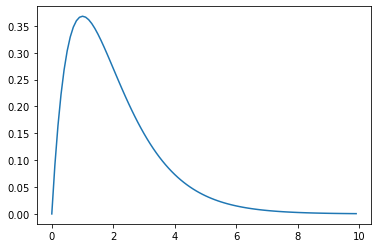

In [17]:
x = np.arange(0, 10, 0.1)
y = x / np.exp(x)

plt.plot(x, y)
plt.show()

In [18]:
x = sp.Symbol('x')
expr = sp.sin(x)/x
expr

sin(x)/x

$$
\lim_{x \to 0} \frac{\sin x}{x}
$$

In [19]:
sp.limit(expr, x, 0)

1

## 微分

In [20]:
x, alpha, y = sp.symbols('x alpha y')

In [21]:
expr = x**alpha
expr

x**alpha

$$
(x^\alpha)'
$$

In [22]:
sp.diff(expr, x)

alpha*x**alpha/x

In [23]:
expr = sp.exp(x)
expr

exp(x)

$$
(e^x)'
$$

In [24]:
sp.diff(expr, x)

exp(x)

In [25]:
expr = sp.log(x)

$$
(\log x)'
$$

In [26]:
sp.diff(expr, x)

1/x

In [27]:
expr = sp.sin(x)

$$
(\sin x)'
$$

In [28]:
sp.diff(expr, x)

cos(x)

In [29]:
expr = sp.cos(x)

$$
(\cos x)'
$$

In [30]:
sp.diff(expr, x)

-sin(x)

In [31]:
expr = 1/x
expr

1/x

$$
\left(\frac{1}{x}\right)'
$$

In [32]:
sp.diff(expr, x)

-1/x**2

In [33]:
expr = (x**2 + 3)**4
expr

(x**2 + 3)**4

$$
((x^2+3)^4)'
$$

In [34]:
sp.diff(expr, x)

8*x*(x**2 + 3)**3

In [35]:
expr = (1 - sp.cos(x))**(sp.Rational(1, 2))/(1 + sp.cos(x))**(sp.Rational(1, 2))
expr

sqrt(1 - cos(x))/sqrt(cos(x) + 1)

$$
\left(\frac{\sqrt{1 - \cos x}}{\sqrt{\cos x +1}}\right)'
$$

In [36]:
sp.simplify(sp.diff(expr, x))

sin(x)/(sqrt(1 - cos(x))*(cos(x) + 1)**(3/2))

### 2階微分

In [37]:
expr = x**3
expr

x**3

$$
(x^3)''
$$

In [38]:
sp.diff(sp.diff(expr, x))

6*x

In [39]:
sp.diff(expr, x, x)

6*x

In [40]:
sp.diff(expr, x, 2)

6*x

In [41]:
expr = sp.sin(x)
expr

sin(x)

$$
(\sin x)''
$$

In [42]:
sp.diff(expr, x, 2)

-sin(x)

### 偏微分

In [43]:
expr = x - 3*y
expr

x - 3*y

$$
\frac{\partial}{\partial x} (x-3y)
$$

In [44]:
sp.diff(expr, x)

1

$$
\frac{\partial}{\partial y} (x-3y)
$$

In [45]:
sp.diff(expr, y)

-3

In [46]:
expr = sp.log(x, y)
expr

log(x)/log(y)

$$
\frac{\partial}{\partial x} \left(\frac{\log x}{\log y}\right)
$$

In [47]:
sp.diff(expr, x)

1/(x*log(y))

$$
\frac{\partial}{\partial y} \left(\frac{\log x}{\log y}\right)
$$

In [48]:
sp.diff(expr, y)

-log(x)/(y*log(y)**2)

## 積分

In [49]:
x = sp.Symbol('x')

In [50]:
expr = x
expr

x

$$
\int x dx
$$

In [51]:
sp.integrate(expr)
# 積分定数𝐶は出力されないことに注意
# sp.integrate(expr, x) でもよい

x**2/2

In [52]:
expr = sp.cos(x)**2 * sp.sin(x)
expr

sin(x)*cos(x)**2

$$
\int \cos^2 x \sin x dx
$$

In [53]:
sp.integrate(expr)

-cos(x)**3/3

### 定積分

In [54]:
expr = -3*x**2 - x + 3
expr

-3*x**2 - x + 3

$$
\int^3_{-1} (-3x^2-x+3)dx
$$

In [55]:
sp.integrate(expr, (x, -1, 3))

-20

In [56]:
expr = sp.exp(-x)
expr

exp(-x)

$$
\int^\infty_{0} e^{-x} dx
$$

In [57]:
sp.integrate(expr, (x, 0, sp.oo))

1

### 累次積分

In [58]:
expr = x * y**2
expr

x*y**2

$$
\int^1_{0} \int^3_{0} xy^2 dx dy
$$

In [59]:
sp.integrate(expr, (x, 0, 3), (y, 0, 1))

3/2